In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
print(tf.__version__)

2.4.1


In [2]:
df_train = pd.read_csv(r'C:\Users\anshu\OneDrive\Desktop\hackathon\data\Training Data.csv')
df_test = pd.read_csv(r'C:\Users\anshu\OneDrive\Desktop\hackathon\data\Test Data.csv')
df_sample = pd.read_csv(r'C:\Users\anshu\OneDrive\Desktop\hackathon\Sample Prediction Dataset.csv')

In [3]:
print(df_train.shape)
df_train.head() 

(252000, 13)


,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
print(df_test.shape)
df_test.head()

(28000, 12)


,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [5]:
df_sample.head()

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [6]:
df_sample.risk_flag.unique()

array([0, 1], dtype=int64)

In [7]:
df_train.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.00,252000.00,252000.00,252000.00,252000.00,252000.00,252000.00
mean,126000.50,4997116.67,49.95,10.08,6.33,12.00,0.12
std,72746.28,2878311.01,17.06,6.00,3.65,1.40,0.33
min,1.00,10310.00,21.00,0.00,0.00,10.00,0.00
25%,63000.75,2503015.00,35.00,5.00,3.00,11.00,0.00
50%,126000.50,5000694.50,50.00,10.00,6.00,12.00,0.00
75%,189000.25,7477502.00,65.00,15.00,9.00,13.00,0.00
max,252000.00,9999938.00,79.00,20.00,14.00,14.00,1.00


In [8]:
df_test.describe()

,id,income,age,experience,current_job_years,current_house_years
count,28000.00,28000.00,28000.00,28000.00,28000.00,28000.00
mean,14000.50,5029562.65,50.05,10.12,6.34,11.99
std,8083.05,2864937.67,17.13,6.03,3.65,1.40
min,1.00,10310.00,21.00,0.00,0.00,10.00
25%,7000.75,2545414.00,35.00,5.00,3.00,11.00
50%,14000.50,5046744.00,50.00,10.00,6.00,12.00
75%,21000.25,7474639.00,65.00,15.00,9.00,13.00
max,28000.00,9999814.00,79.00,20.00,14.00,14.00


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   28000 non-null  int64 
 1   income               28000 non-null  int64 
 2   age                  28000 non-null  int64 
 3   experience           28000 non-null  int64 
 4   married              28000 non-null  object
 5   house_ownership      28000 non-null  object
 6   car_ownership        28000 non-null  object
 7   profession           28000 non-null  object
 8   city                 28000 non-null  object
 9   state                28000 non-null  object
 10  current_job_years    28000 non-null  int64 
 11  current_house_years  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


## Understanding Each and every column by visualization ------- df_train

In [11]:
df_train.head(50)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [12]:
df_train.shape

(252000, 13)

In [13]:
df_train.tail(40)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
251960,251961,5128486,76,8,single,owned,yes,Graphic_Designer,Nandyal,Andhra_Pradesh,8,13,1
251961,251962,2358249,52,5,single,rented,no,Police_officer,Suryapet,Telangana,5,14,0
251962,251963,1696985,41,11,single,rented,yes,Flight_attendant,Patiala,Punjab,6,12,0
251963,251964,7881308,29,5,single,norent_noown,yes,Politician,Serampore,West_Bengal,5,14,0
251964,251965,520057,40,13,single,rented,yes,Analyst,Shahjahanpur,Uttar_Pradesh,13,14,0
251965,251966,2666519,47,20,married,rented,no,Comedian,Noida,Uttar_Pradesh,3,11,0
251966,251967,9834384,28,13,single,rented,no,Dentist,Hazaribagh,Jharkhand,5,14,1
251967,251968,1036851,23,9,single,rented,no,Technical_writer,Pondicherry,Puducherry,6,10,0
251968,251969,9600165,68,13,single,rented,yes,Secretary,Loni,Uttar_Pradesh,13,14,1
251969,251970,5198892,70,9,single,rented,no,Secretary,Dehradun,Uttarakhand,9,11,0


In [14]:
df_test.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [15]:
df_test.shape

(28000, 12)

In [16]:
df_train.house_ownership.unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

<AxesSubplot:>

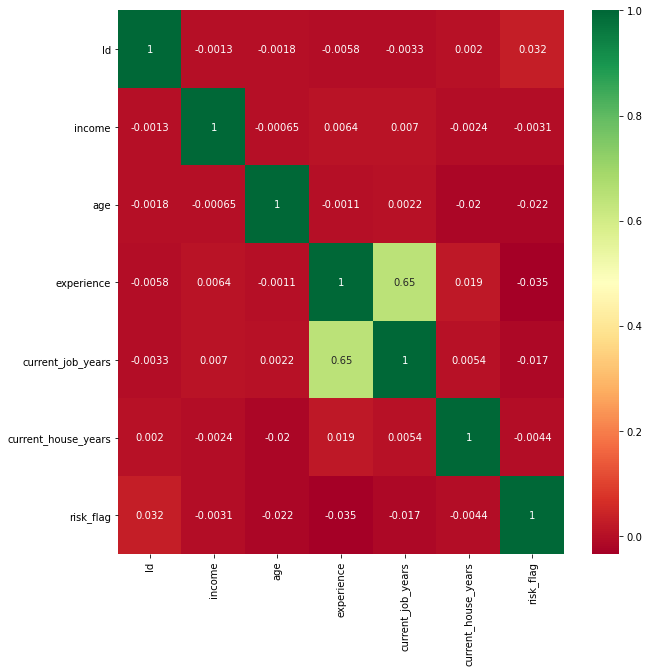

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
sns.heatmap(df_train.corr(), cmap='RdYlGn', annot = True)

<AxesSubplot:>

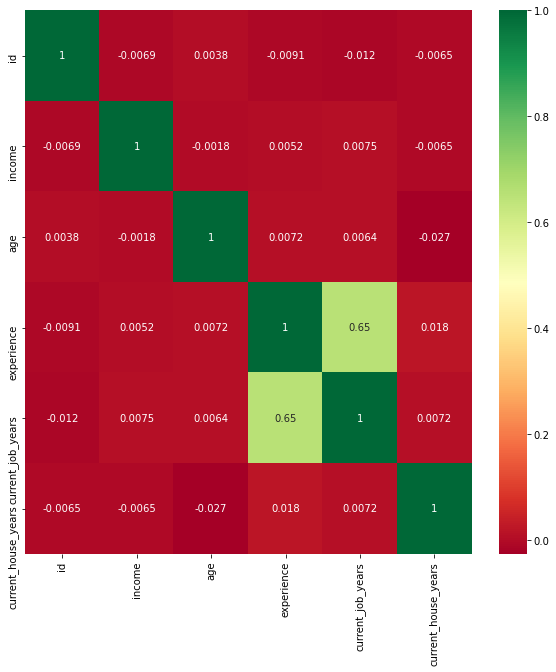

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df_test.corr(), annot= True, cmap='RdYlGn')

##### So from the correleation plot, we can see that 5 columns are very correlated with the risk_flag output dependency.

##### 1) current_job_years
##### 2) age
##### 3) income
##### 4) experience
##### 5) current_house_years

##### Now, In the testing data, we can see that experience and current_job_years are highly correlated. So removing one of them would be better. So now I will remove the 'current_job_years' column from the training part and finalize all my columns as:

##### 1) age
##### 2) income
##### 3) experience
##### 4) current_house_years
##### And these columns will help me classify the risk_flag

In [19]:
df_train.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [20]:
col = ['Id', 'income', 'age', 'experience', 'current_house_years', 'risk_flag']

In [21]:
df_train_temp = df_train[col]
df_train_temp.head()

,Id,income,age,experience,current_house_years,risk_flag
0,1,1303835,23,3,13,0
1,2,7574516,40,10,13,0
2,3,3991815,66,4,10,0
3,4,6256451,41,2,12,1
4,5,5768871,47,11,14,1


In [22]:
df_train_temp.shape[0] == df_train.shape[0]

True

<AxesSubplot:>

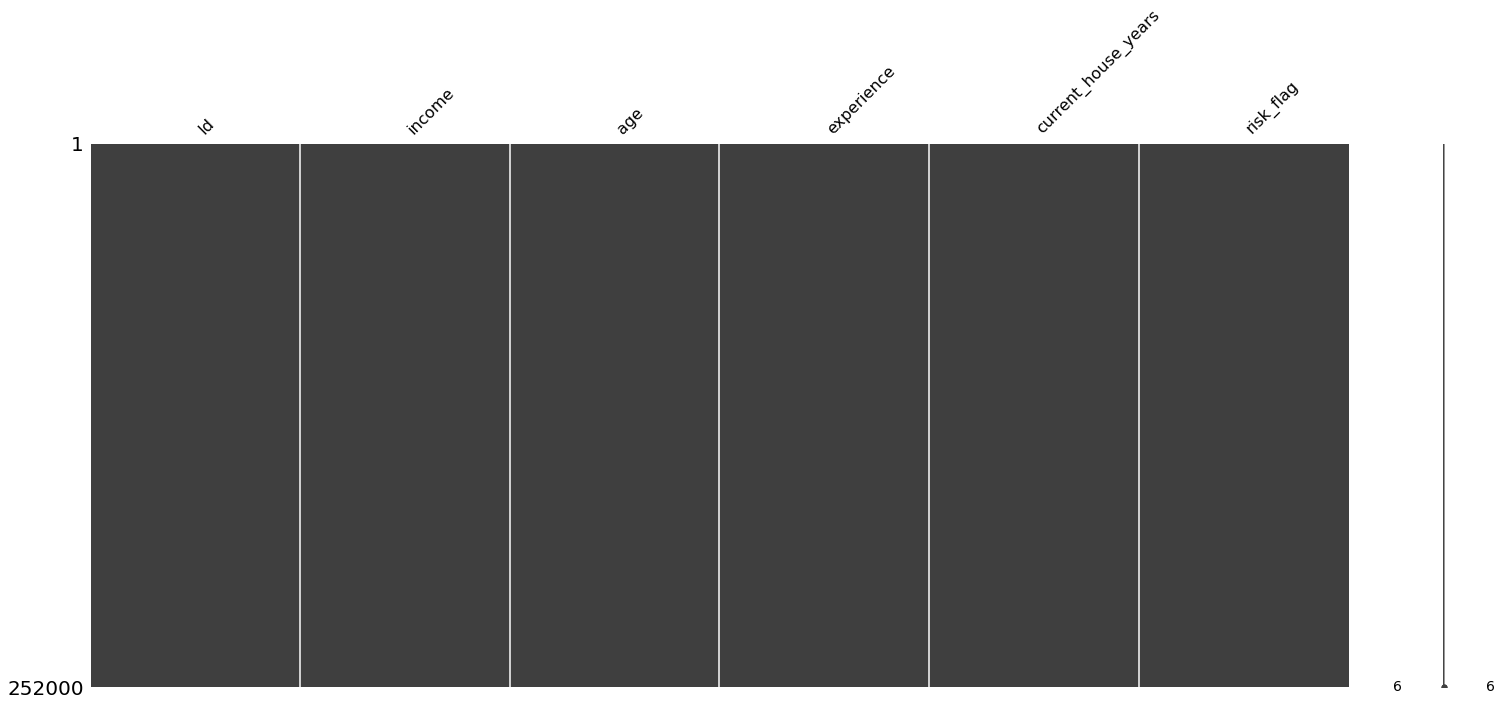

In [23]:
import missingno
missingno.matrix(df_train_temp)

### Now we Understand all the columns

#### 1) age -------------------------------------------------------------------------------------------

In [24]:
df_train_temp.age.isnull().sum()

0

In [25]:
df_test.age.isnull().sum()

0

In [26]:
df_train_temp.age.describe()

count   252000.00
mean        49.95
std         17.06
min         21.00
25%         35.00
50%         50.00
75%         65.00
max         79.00
Name: age, dtype: float64

In [27]:
df_test.age.describe()

count   28000.00
mean       50.05
std        17.13
min        21.00
25%        35.00
50%        50.00
75%        65.00
max        79.00
Name: age, dtype: float64

In [28]:
df_train_temp.age.dtype == df_test.age.dtype

True

In [29]:
df_test.age.dtype

dtype('int64')

<AxesSubplot:xlabel='Frequency'>

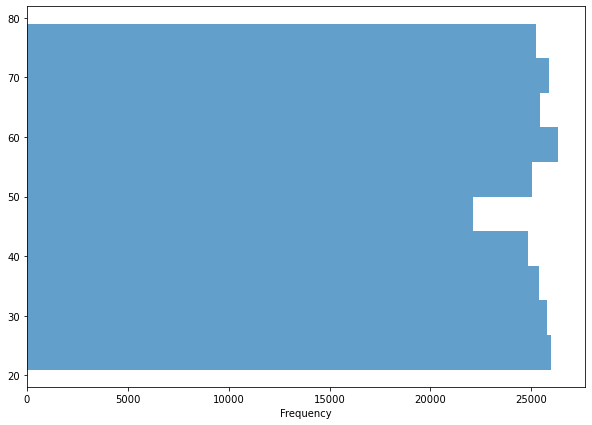

In [30]:
df_train_temp['age'].plot.hist(alpha=0.7, figsize=(10, 7), orientation="horizontal")

<AxesSubplot:xlabel='Frequency'>

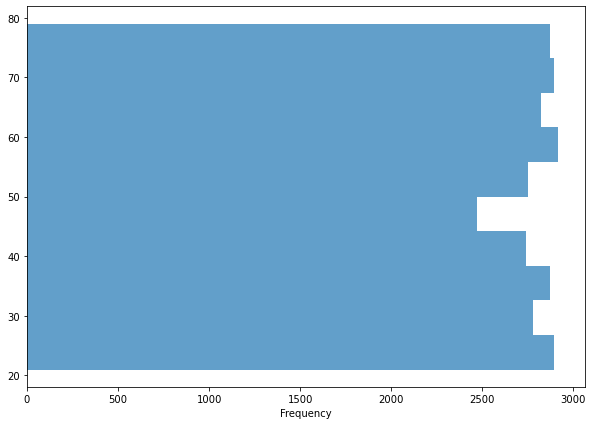

In [31]:
df_test['age'].plot.hist(alpha=0.7, figsize=(10, 7), orientation="horizontal")

In [32]:
data = np.asarray([df_train_temp.age])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)

df_train_temp['age'] = scaled

In [33]:
df_train_temp.head()

,Id,income,age,experience,current_house_years,risk_flag
0,1,1303835,0.03,3,13,0
1,2,7574516,0.33,10,13,0
2,3,3991815,0.78,4,10,0
3,4,6256451,0.34,2,12,1
4,5,5768871,0.45,11,14,1


#### 2) income

In [34]:
df_train_temp.income.describe()

count    252000.00
mean    4997116.67
std     2878311.01
min       10310.00
25%     2503015.00
50%     5000694.50
75%     7477502.00
max     9999938.00
Name: income, dtype: float64

In [35]:
df_test.income.describe()

count     28000.00
mean    5029562.65
std     2864937.67
min       10310.00
25%     2545414.00
50%     5046744.00
75%     7474639.00
max     9999814.00
Name: income, dtype: float64

In [36]:
df_train_temp.income.isnull().sum()

0

In [37]:
df_test.income.isnull().sum()

0

In [38]:
df_train_temp.income.value_counts()

7936020    77
9775375    71
1996629    71
9345456    70
7638998    40
           ..
5446449     1
7330601     1
3377955     1
2779935     1
7907349     1
Name: income, Length: 41917, dtype: int64

In [39]:
df_test.income.value_counts()

4254644    13
3846207    11
6098816    11
9886718    11
5531708    11
           ..
472986      1
5670325     1
3088351     1
1666523     1
5081161     1
Name: income, Length: 9916, dtype: int64

In [40]:
df_test['income']

0        7393090
1        1215004
2        8901342
3        1944421
4          13429
          ...   
27995    9955481
27996    2917765
27997    8082415
27998    9474180
27999    9250350
Name: income, Length: 28000, dtype: int64

In [41]:
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# data = np.asarray([df_train_temp['income']])
# new_data = data.reshape(-1,1)

# scaler = StandardScaler()
# scaled = scaler.fit_transform(new_data)
# print(scaled)

In [42]:
data = np.asarray([df_train_temp['income']])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)
print(scaled)

[[0.1294868 ]
 [0.75720597]
 [0.39856389]
 ...
 [0.45168228]
 [0.65035635]
 [0.90693267]]


In [43]:
df_train_temp['income'] = scaled

In [44]:
df_train_temp.head()

,Id,income,age,experience,current_house_years,risk_flag
0,1,0.13,0.03,3,13,0
1,2,0.76,0.33,10,13,0
2,3,0.40,0.78,4,10,0
3,4,0.63,0.34,2,12,1
4,5,0.58,0.45,11,14,1


#### 3) experience

In [45]:
df_train_temp.experience.isnull().sum()

0

In [46]:
df_test.experience.isnull().sum()

0

In [47]:
df_train_temp.experience.describe()

count   252000.00
mean        10.08
std          6.00
min          0.00
25%          5.00
50%         10.00
75%         15.00
max         20.00
Name: experience, dtype: float64

In [48]:
df_test.experience.describe()

count   28000.00
mean       10.12
std         6.03
min         0.00
25%         5.00
50%        10.00
75%        15.00
max        20.00
Name: experience, dtype: float64

<AxesSubplot:xlabel='experience', ylabel='count'>

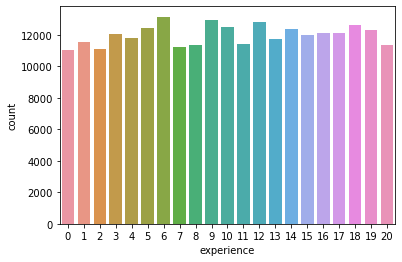

In [49]:
sns.countplot(x = df_train_temp['experience'])

<AxesSubplot:xlabel='experience', ylabel='count'>

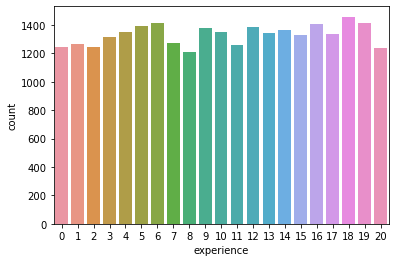

In [50]:
sns.countplot(x = df_test['experience'])

In [51]:
data = np.asarray([df_train_temp.experience])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)

df_train_temp['experience'] = scaled

In [52]:
df_train_temp.head()

,Id,income,age,experience,current_house_years,risk_flag
0,1,0.13,0.03,0.15,13,0
1,2,0.76,0.33,0.50,13,0
2,3,0.40,0.78,0.20,10,0
3,4,0.63,0.34,0.10,12,1
4,5,0.58,0.45,0.55,14,1


##### 4) current_house_years

In [53]:
df_train_temp.current_house_years.describe()

count   252000.00
mean        12.00
std          1.40
min         10.00
25%         11.00
50%         12.00
75%         13.00
max         14.00
Name: current_house_years, dtype: float64

In [54]:
df_test.current_house_years.describe()

count   28000.00
mean       11.99
std         1.40
min        10.00
25%        11.00
50%        12.00
75%        13.00
max        14.00
Name: current_house_years, dtype: float64

<AxesSubplot:xlabel='current_house_years', ylabel='count'>

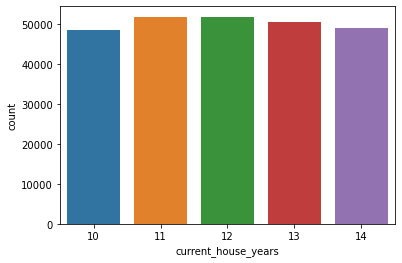

In [55]:
sns.countplot(x = df_train_temp['current_house_years'])

<AxesSubplot:xlabel='current_house_years', ylabel='count'>

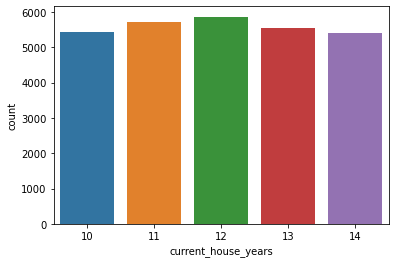

In [56]:
sns.countplot(x = df_test['current_house_years'])

In [57]:
df_train_temp.current_house_years.isnull().sum()

0

In [58]:
df_test.current_house_years.isna().sum()

0

In [59]:
data = np.asarray([df_train_temp.current_house_years])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)

df_train_temp['current_house_years'] = scaled

In [60]:
df_train_temp.head(20)

,Id,income,age,experience,current_house_years,risk_flag
0,1,0.13,0.03,0.15,0.75,0
1,2,0.76,0.33,0.50,0.75,0
2,3,0.40,0.78,0.20,0.00,0
3,4,0.63,0.34,0.10,0.50,1
4,5,0.58,0.45,0.55,1.00,1
5,6,0.69,0.74,0.00,0.50,0
6,7,0.39,0.64,0.70,0.50,0
7,8,0.17,0.21,0.10,1.00,0
8,9,0.76,0.05,0.85,0.25,0
9,10,0.90,0.03,0.60,0.75,0


##### Dependent feature -----> 'risk_flag'

In [61]:
df_train_temp.risk_flag.value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

<AxesSubplot:xlabel='risk_flag', ylabel='count'>

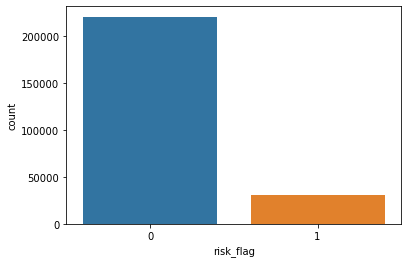

In [62]:
sns.countplot(x = df_train_temp.risk_flag)

In [63]:
# there is a problem with our data as it is highly imbalanced.

x = df_train_temp['risk_flag'].value_counts()[0]
y = df_train_temp['risk_flag'].value_counts()[1]

print(x , ":", y)



221004 : 30996


In [64]:
print(x/y)

7.130081300813008


### Now we will solve this problem

In [65]:
df_train_temp.head()

,Id,income,age,experience,current_house_years,risk_flag
0,1,0.13,0.03,0.15,0.75,0
1,2,0.76,0.33,0.50,0.75,0
2,3,0.40,0.78,0.20,0.00,0
3,4,0.63,0.34,0.10,0.50,1
4,5,0.58,0.45,0.55,1.00,1


In [66]:
df_train_temp.tail()

,Id,income,age,experience,current_house_years,risk_flag
251995,251996,0.82,0.38,0.65,0.25,0
251996,251997,0.28,0.09,0.50,0.25,0
251997,251998,0.45,0.43,0.35,0.50,0
251998,251999,0.65,0.41,0.00,0.00,0
251999,252000,0.91,0.84,0.85,0.25,0


In [67]:
X = df_train_temp.iloc[:, 1:-1]
y = df_train_temp.iloc[:, -1]

In [68]:
X.head()

,income,age,experience,current_house_years
0,0.13,0.03,0.15,0.75
1,0.76,0.33,0.50,0.75
2,0.40,0.78,0.20,0.00
3,0.63,0.34,0.10,0.50
4,0.58,0.45,0.55,1.00


In [69]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: risk_flag, dtype: int64

### 1) without any imabalanced techniques:

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [71]:
# 10.0 **np.arange(-2,3)

In [72]:
# log_class=LogisticRegression()
# grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
# cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [73]:
# clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
# clf.fit(X_train,y_train)

In [74]:
# y_pred=clf.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
# print(tn, fp, fn, tp)
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

#### 2) Undersampling

In [75]:
# from collections import Counter
# from imblearn.under_sampling import NearMiss
# Counter(y_train)

# ns=NearMiss(0.8)
# X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
# print("The number of classes before fit {}".format(Counter(y_train)))
# print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [76]:
# from sklearn.ensemble import RandomForestClassifier
# classifier=RandomForestClassifier()
# classifier.fit(X_train_ns,y_train_ns)

# y_pred=classifier.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print('\n')
# tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
# print(tn, fp, fn, tp)
# print('\n')
# print(accuracy_score(y_test,y_pred))
# print('\n')
# print(classification_report(y_test,y_pred))

#### 2) oversampling

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [78]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter


os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))


The number of classes before fit Counter({0: 176868, 1: 24732})
The number of classes after fit Counter({0: 176868, 1: 132651})


In [79]:
classifier_1=RandomForestClassifier()
classifier_1.fit(X_train_ns,y_train_ns)

y_pred=classifier_1.predict(X_test)
print('\n')
print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
print('\n')
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



[[39772  4364]
 [ 1293  4971]]
39772 4364 1293 4971


0.8877579365079366
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     44136
           1       0.53      0.79      0.64      6264

    accuracy                           0.89     50400
   macro avg       0.75      0.85      0.79     50400
weighted avg       0.91      0.89      0.90     50400



In [80]:
1331  + 4486

5817

#### With different classifiers

In [81]:
# RandomForestClassifier

In [82]:
# model01 = RandomForestClassifier(n_estimators = 100, class_weight=None, criterion='gini', max_depth=5,
#             max_features="auto", max_leaf_nodes=10, min_samples_leaf=50,
#             min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=50, n_jobs = -1, oob_score = True)

# model01.fit(X_train_ns,y_train_ns)

In [83]:
# y_pred=model01.predict(X_test)

# print('\n')
# print(confusion_matrix(y_test,y_pred))
# tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
# print(tn, fp, fn, tp)
# print('\n')
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [84]:
# DecisionTreeClassifier

In [85]:
# from sklearn.tree import DecisionTreeClassifier


In [86]:
# model02 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
#             max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
#             min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=None, splitter='random')

# model02.fit(X_train_ns,y_train_ns)

In [87]:
# y_pred=model02.predict(X_test)

# print('\n')
# print(confusion_matrix(y_test,y_pred))
# tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
# print(tn, fp, fn, tp)
# print('\n')
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [88]:
# MultinomialNB

In [89]:
# from sklearn.naive_bayes import MultinomialNB

# mnb = MultinomialNB()
# mnb.fit(X_train_ns,y_train_ns)



In [90]:
# y_pred=mnb.predict(X_test)

# print('\n')
# print(confusion_matrix(y_test,y_pred))
# tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
# print(tn, fp, fn, tp)
# print('\n')
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

# 0.8756746031746032 wrong

In [91]:
# SVM

In [92]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC

In [93]:
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf.fit(X_train_ns,y_train_ns)

In [94]:
# y_pred=clf.predict(X_test)

# print('\n')
# print(confusion_matrix(y_test,y_pred))
# tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
# print(tn, fp, fn, tp)
# print('\n')
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [95]:
# Catboost

In [96]:
# from catboost import CatBoostClassifier, Pool, cv
# from sklearn.metrics import accuracy_score
# params = {'iterations': 500,
#           'learning_rate': 0.1,
#           'eval_metric': 'Accuracy',
#           'random_seed': 42,
#           'logging_level': 'Silent',
#           'use_best_model': True}


# categorical_feature_indices = np.where(X_train_ns.dtypes != np.float)[0]

# train_pool = Pool(X_train_ns, y_train_ns, cat_features = categorical_feature_indices)
# test_pool = Pool(X_test, y_test, cat_features = categorical_feature_indices)

# model = CatBoostClassifier(**params)
# model.fit(train_pool, eval_set=test_pool)

In [97]:
# y_pred=model.predict(X_test)

# print('\n')
# print(confusion_matrix(y_test,y_pred))
# tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
# print(tn, fp, fn, tp)
# print('\n')
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

# # 0.8608928571428571

In [98]:
# Passive aggressive classifier

In [99]:
# from sklearn.linear_model import PassiveAggressiveClassifier

# clf_passive = PassiveAggressiveClassifier(max_iter=1000, random_state=42, tol=1e-3)

# clf_passive.fit(X_train_ns,y_train_ns)

# y_pred=clf_passive.predict(X_test)

# print('\n')
# print(confusion_matrix(y_test,y_pred))
# tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
# print(tn, fp, fn, tp)
# print('\n')
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

#### 3) SMOTETomek

In [100]:
# from imblearn.combine import SMOTETomek
# from sklearn.ensemble import RandomForestClassifier

# st=SMOTETomek(0.75)
# X_train_ns,y_train_ns=st.fit_resample(X_train,y_train)
# print("The number of classes before fit {}".format(Counter(y_train)))
# print("The number of classes after fit {}".format(Counter(y_train_ns)))


In [101]:
# classifier_2=RandomForestClassifier()
# classifier_2.fit(X_train_ns,y_train_ns)


# y_pred=classifier_2.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

#### 4) Ensemble Techniques

In [102]:
# from imblearn.ensemble import EasyEnsembleClassifier

# easy=EasyEnsembleClassifier()
# easy.fit(X_train,y_train)

# y_pred=easy.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

##[[27011 17051]
#  [ 3234  3104]]
# 0.5975198412698413

#### 5) ANN

In [103]:
# import tensorflow as tf
# from tensorflow import keras
# from sklearn.metrics import confusion_matrix , classification_report

# def ANN(X_train, y_train, X_test, y_test, loss, weights):
#     model = keras.Sequential([
#         keras.layers.Dense(4, input_dim=4, activation='relu'),
#         keras.layers.Dense(15, activation='relu'),
#         keras.layers.Dense(1, activation='sigmoid')
#     ])

#     model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
#     if weights == -1:
#         model.fit(X_train, y_train, epochs=100)
#     else:
#         model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
#     print(model.evaluate(X_test, y_test))
    
#     y_preds = model.predict(X_test)
#     y_preds = np.round(y_preds)
    
#     print("Classification Report: \n", classification_report(y_test, y_preds))
    
#     return y_preds

# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='minority')
# X_sm, y_sm = smote.fit_resample(X, y)

# y_sm.value_counts()

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

# y_train.value_counts()

# y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

## Final Deployment on the test data

### UNderstand and viusalize our test data

In [104]:
1035 + 5946 #----> rf

6981

In [105]:
356 + 6095  # ----->dt

6451

In [106]:
1484 + 5558 #--------> catboost

7042

In [107]:
df_test.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [108]:
col = ['income', 'age', 'experience', 'current_house_years']
df_test_temp = df_test[col]

df_test_temp.head()

,income,age,experience,current_house_years
0,7393090,59,19,13
1,1215004,25,5,10
2,8901342,50,12,14
3,1944421,49,9,12
4,13429,25,18,11


In [109]:
df_test_temp.shape

(28000, 4)

In [110]:
# scaling all of them

In [111]:
data = np.asarray([df_test_temp.income])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)

df_test_temp['income'] = scaled

In [112]:
data = np.asarray([df_test_temp.age])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)

df_test_temp['age'] = scaled

In [113]:
data = np.asarray([df_test_temp.current_house_years])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)

df_test_temp['current_house_years'] = scaled

In [114]:
data = np.asarray([df_test_temp.experience])
new_data = data.reshape(-1,1)

scaler = MinMaxScaler(feature_range= (0,1))
scaled = scaler.fit_transform(new_data)

df_test_temp['experience'] = scaled

In [115]:
df_test_temp.head()

,income,age,experience,current_house_years
0,0.74,0.66,0.95,0.75
1,0.12,0.07,0.25,0.00
2,0.89,0.50,0.60,1.00
3,0.19,0.48,0.45,0.50
4,0.00,0.07,0.90,0.25


In [116]:
# we have selected the oversampling method + randomforest

In [117]:
df_test_temp.shape

(28000, 4)

# This is the Part

In [ ]:
y_pred_final = classifier_1.predict(df_test_temp)

# print('\n')
# print(confusion_matrix(y_test,y_pred_final))
# tn, fp, fn, tp = confusion_matrix(y_test,y_pred_final).ravel()
# print(tn, fp, fn, tp)
# print('\n')
# print(accuracy_score(y_test,y_pred_final))
# print(classification_report(y_test,y_pred_final))

In [ ]:
count = 0
for i in y_pred_final:
    if i == 0:
        count += 1
        
print(count)

In [ ]:
count = 0
for i in y_pred_final:
    if i == 1:
        count += 1
        
print(count)

In [ ]:
y_pred_final

## making the submission

In [ ]:
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['risk_flag'] = y_pred_final # our model predictions on the test dataset
submission.head()

In [ ]:
submission['risk_flag'] = submission['risk_flag'].astype(int)
print('Converted Survived column to integers.')

In [ ]:
if len(submission) == len(df_test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

In [ ]:
submission.to_csv(r'C:\Users\anshu\OneDrive\Desktop\hackathon/submission_2.csv', index=False)
print('Submission CSV is ready!')